<a href="https://colab.research.google.com/github/Hrenani/some_problem/blob/main/Logistic_regression(for_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **🔸 Load Dataset**

In [4]:
df = pd.read_csv('exam.csv')
df

,study_hours,pass_fail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [5]:
#Train-Test Split
X = df[['study_hours']].values
y = df[['pass_fail']].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 1), (4, 1), (16, 1), (4, 1))

## Logistic Regression (from Scratch)

In [6]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def logistic_regression(x,w):
  y_hat = sigmoid(x @ w)
  return y_hat

In [7]:
y_hat = logistic_regression(np.random.randn(5,2), np.random.randn(2,1))
y_hat

array([[0.39299483],
       [0.52635955],
       [0.205113  ],
       [0.58814984],
       [0.68125148]])

### Binary Cross Entropy(BCE)

In [8]:
def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)* np.log(1-y_hat)))
  return loss

In [9]:
bce(np.ones((5,1)),y_hat)

0.8149042180478203

### Gradient

In [10]:
def gradient(x,y,y_hat):
  grads = (x.T @ (y_hat - y))/ len(y)
  return grads

gradient(np.random.randn(5,2), np.ones((5,1)), y_hat)

array([[ 0.41998187],
       [-0.18478548]])

### Gradient Descent

In [11]:
def gradient_descent(w,eta,grads):
  w = w - eta*grads
  return w

### Accuracy

In [12]:
def accuracy(y,y_hat):
  acc = np.sum(y == np.round( y_hat))/len(y)
  return acc

accuracy(np.array([1,0,1]), np.array([0.7,0.5,0.3]))

0.6666666666666666

Train

In [13]:
x_train = np.hstack((np.ones((len(x_train),1)),x_train))
x_train.shape

(16, 2)

In [14]:


m = 1
w = np.random.randn(m+1,1)
print(w.shape)

eta = 0.01
n_epochs = 2000

(2, 1)


In [15]:
error_hist = []
for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train,w)

  e = bce(y_train,y_hat)
  error_hist.append(e)

  grads = gradient(x_train,y_train,y_hat)

  w = gradient_descent(w,eta,grads)

  if (epoch+1) %100 == 0:
    print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=99, 	 E=0.7468,	 w=[-0.08047441  0.50415253]
Epoch=199, 	 E=0.634,	 w=[-0.26000429  0.26681692]
Epoch=299, 	 E=0.6231,	 w=[-0.36187422  0.26392581]
Epoch=399, 	 E=0.6145,	 w=[-0.45168075  0.28817282]
Epoch=499, 	 E=0.6065,	 w=[-0.53735552  0.3141238 ]
Epoch=599, 	 E=0.599,	 w=[-0.61977464  0.33943488]
Epoch=699, 	 E=0.5921,	 w=[-0.69915001  0.3639195 ]
Epoch=799, 	 E=0.5857,	 w=[-0.77562664  0.38759043]
Epoch=899, 	 E=0.5797,	 w=[-0.84933793  0.41047833]
Epoch=999, 	 E=0.5742,	 w=[-0.92041089  0.43261467]
Epoch=1099, 	 E=0.569,	 w=[-0.98896664  0.45402994]
Epoch=1199, 	 E=0.5642,	 w=[-1.05512051  0.47475353]
Epoch=1299, 	 E=0.5597,	 w=[-1.11898221  0.49481363]
Epoch=1399, 	 E=0.5556,	 w=[-1.18065597  0.51423729]
Epoch=1499, 	 E=0.5517,	 w=[-1.24024073  0.5330504 ]
Epoch=1599, 	 E=0.548,	 w=[-1.29783031  0.55127771]
Epoch=1699, 	 E=0.5446,	 w=[-1.35351368  0.56894287]
Epoch=1799, 	 E=0.5414,	 w=[-1.40737516  0.58606846]
Epoch=1899, 	 E=0.5384,	 w=[-1.4594946   0.60267603]
Epoch=19

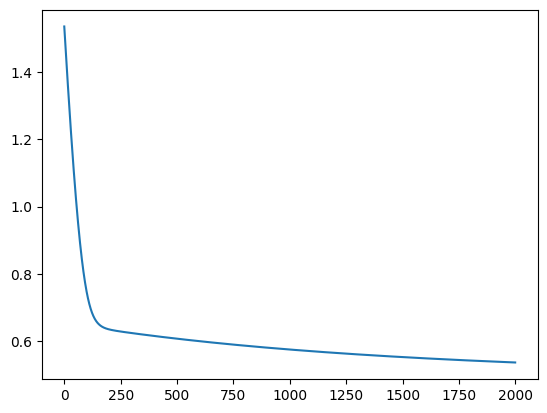

In [16]:
plt.plot(error_hist)

### Test

In [17]:
x_test = np.hstack((np.ones((len(x_test),1)), x_test))
x_test.shape

(4, 2)

In [18]:
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

1.0

In [19]:

y_hat,y_test

(array([[0.23137656],
        [0.80679009],
        [0.75396892],
        [0.26002125]]),
 array([[0],
        [1],
        [1],
        [0]]))

# Dataset

In [20]:
from sklearn.datasets import load_breast_cancer, make_classification,make_blobs,make_circles


In [21]:
X, y = load_breast_cancer(return_X_y=True)
X.shape,y.shape

((569, 30), (569,))

(1000, 2) (1000,)


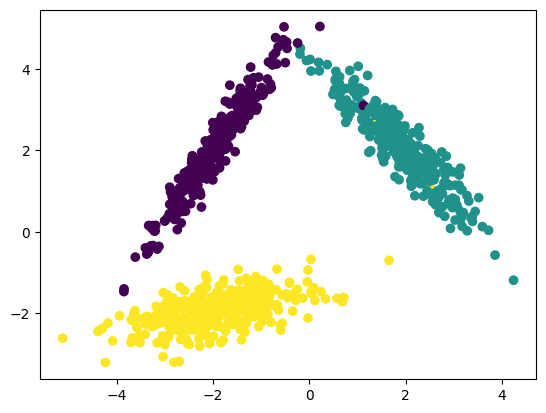

In [22]:
X,y = make_classification(n_samples= 1000, n_features=2,n_redundant=0,n_clusters_per_class=1,class_sep=2.0,n_classes=3,random_state=42)
print(X.shape,y.shape)

plt.scatter(X[:,0],X[:,1],c = y)

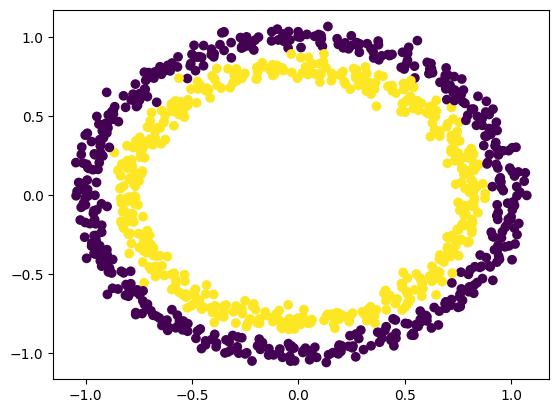

In [23]:
X,y = make_circles(n_samples = 1000,noise = 0.04)

plt.scatter(X[:,0],X[:,1],c = y)

## **🔸 Logistic Regression (sklearn)**

In [24]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [25]:
X,y = load_breast_cancer(return_X_y=True)
X.shape,y.shape


((569, 30), (569,))

In [26]:
'''train_test_split is not good for this model becuse
the sample is not selected equally from all classes,
but for step by step training,
I am writing this audio with the code so that we can fix it later.'''

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

# LogisticRegression()

In [27]:
model = LogisticRegression(solver = 'sag', max_iter = 200, random_state= 42)
model.fit(x_train,y_train)
model.predict(x_test), y_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1]))

In [28]:
model.predict_proba(x_test)

array([[1.96795029e-01, 8.03204971e-01],
       [8.04578576e-02, 9.19542142e-01],
       [1.58385785e-01, 8.41614215e-01],
       [9.59723116e-01, 4.02768842e-02],
       [5.83099212e-02, 9.41690079e-01],
       [1.90181823e-01, 8.09818177e-01],
       [1.00000000e+00, 7.80479188e-14],
       [2.24272151e-01, 7.75727849e-01],
       [9.98954714e-01, 1.04528625e-03],
       [6.38680526e-02, 9.36131947e-01],
       [7.90807782e-01, 2.09192218e-01],
       [1.84262073e-01, 8.15737927e-01],
       [3.54876663e-01, 6.45123337e-01],
       [1.60051432e-01, 8.39948568e-01],
       [4.08196793e-01, 5.91803207e-01],
       [3.12090877e-01, 6.87909123e-01],
       [7.10379072e-01, 2.89620928e-01],
       [8.48311491e-02, 9.15168851e-01],
       [9.90207042e-01, 9.79295794e-03],
       [1.09548333e-01, 8.90451667e-01],
       [9.99987842e-01, 1.21579631e-05],
       [6.08297026e-02, 9.39170297e-01],
       [4.30043789e-01, 5.69956211e-01],
       [1.04022193e-01, 8.95977807e-01],
       [9.904959

In [29]:
model.predict_log_proba(x_test)

array([[-1.62559255e+00, -2.19145341e-01],
       [-2.52002174e+00, -8.38794041e-02],
       [-1.84272155e+00, -1.72433546e-01],
       [-4.11104572e-02, -3.21197757e+00],
       [-2.84198302e+00, -6.00790620e-02],
       [-1.65977470e+00, -2.10945529e-01],
       [-7.80486786e-14, -3.01814534e+01],
       [-1.49489500e+00, -2.53953530e-01],
       [-1.04583294e-03, -6.86346451e+00],
       [-2.75093600e+00, -6.59988430e-02],
       [-2.34700347e-01, -1.56450175e+00],
       [-1.69139622e+00, -2.03662144e-01],
       [-1.03598498e+00, -4.38313760e-01],
       [-1.83226007e+00, -1.74414617e-01],
       [-8.96005886e-01, -5.24581120e-01],
       [-1.16446086e+00, -3.74098539e-01],
       [-3.41956547e-01, -1.23918236e+00],
       [-2.46709248e+00, -8.86466942e-02],
       [-9.84122432e-03, -4.62609173e+00],
       [-2.21138943e+00, -1.16026454e-01],
       [-1.21580370e-05, -1.13175262e+01],
       [-2.79967708e+00, -6.27584558e-02],
       [-8.43868241e-01, -5.62195743e-01],
       [-2.

In [30]:
model.score(x_train,y_train)

0.9142857142857143

In [31]:
model.score(x_test,y_test)

0.9473684210526315

### `SGDClassifier()`

In [32]:
model = SGDClassifier(loss = 'log_loss',random_state=42)
model.fit(x_train,y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [33]:
model.score(x_train,y_train)

0.9054945054945055

In [34]:
model.score(x_test,y_test)

0.9649122807017544

## **🔸 Decision Boundary**

In [35]:

from sklearn.datasets import make_classification, make_blobs, make_circles

(1000, 2) (1000,)


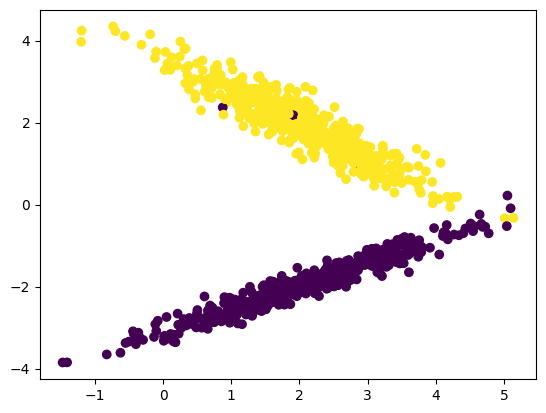

In [36]:
X, y = make_classification(n_samples=1000,
                           n_features = 2,
                           n_redundant = 0,
                           n_classes = 2,
                           n_clusters_per_class = 1,
                           class_sep = 2,
                           random_state = 42)
print(X.shape,y.shape)

plt.scatter(X[:,0],X[:,1],c = y);

In [37]:
model = LogisticRegression()
model.fit(X,y)


LogisticRegression()

-1.4727177022170639 -3.850971449868199 5.138715401007325 4.342864069511592
(500, 500) (500, 500)


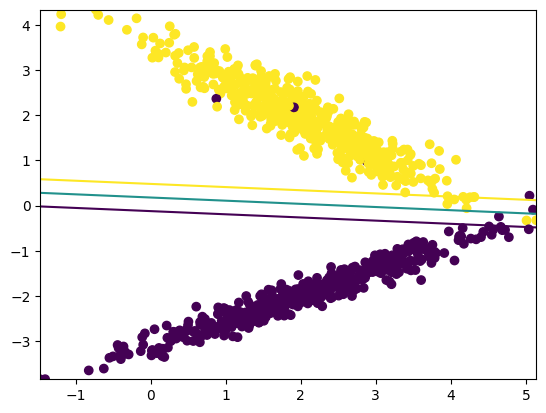

In [38]:
x1_min,x2_min = X.min(0)
x1_max,x2_max = X.max(0)

print(x1_min,x2_min,x1_max,x2_max)

n = 500
x1r = np.linspace(x1_min,x1_max,n)
x2r = np.linspace(x2_min,x2_max,n)
x1m,x2m = np.meshgrid(x1r,x2r)
print(x1m.shape,x2m.shape)

xm = np.stack((x1m.flatten(), x2m.flatten()), axis = 1)
ym = model.decision_function(xm)

plt.scatter(X[:,0],X[:,1],c = y)
plt.contour(x1m,x2m,ym.reshape(x1m.shape), levels = [-1,0,1])


### mlxtend

In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

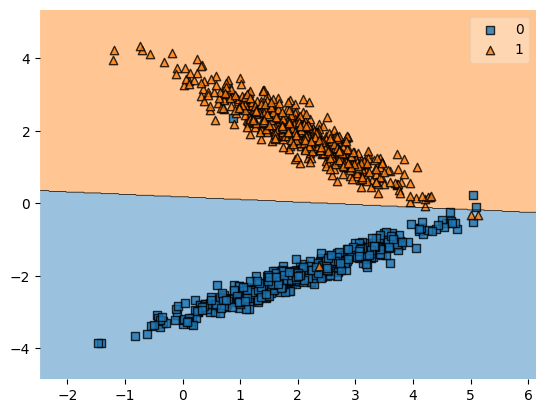

In [40]:
plot_decision_regions(X,y,clf = model)

## **🔸 Nonlinear Logistic Regression**

In [41]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,SplineTransformer
from sklearn.pipeline import make_pipeline

### dataset1

(100, 2) (100,)


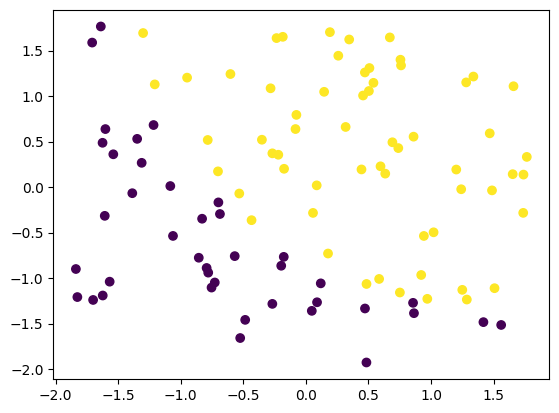

In [42]:
data = np.loadtxt('/content/ex2data1.txt',delimiter = ',')

X = data[:,:-1].copy()
y = data[:,-1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

print(X.shape,y.shape)

plt.scatter(X[:,0],X[:,1],c = y);

<Axes: >

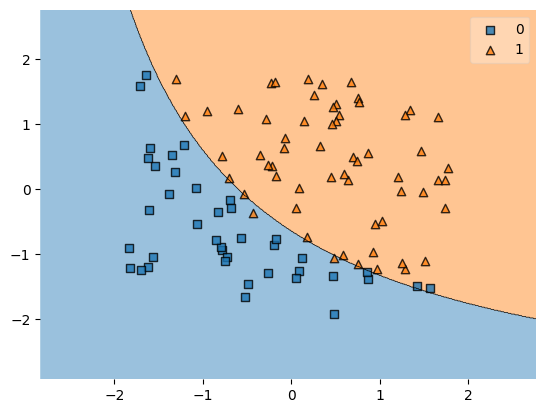

In [43]:

model = make_pipeline(PolynomialFeatures(degree=2, interaction_only=True),
                      LogisticRegression())
model.fit(X,y)
plot_decision_regions(X,y,clf = model)

### Dataset 2

(118, 2) (118,)


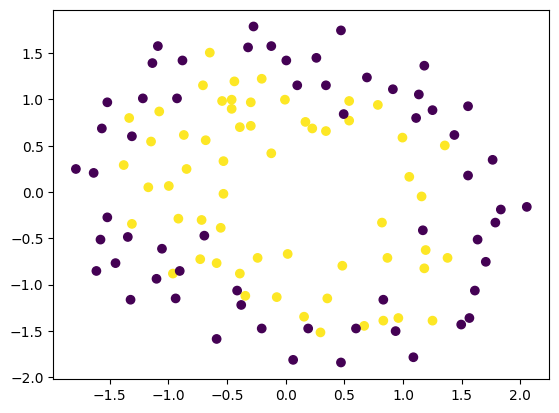

In [44]:
data = np.loadtxt('/content/ex2data2.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y);

<Axes: >

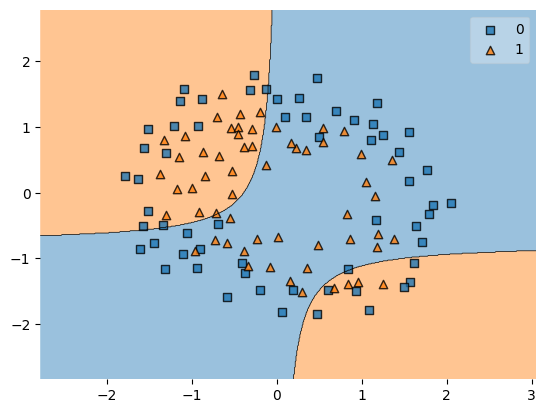

In [45]:
model = make_pipeline(PolynomialFeatures(degree=2,interaction_only=True),
                      LogisticRegression())
model.fit(X, y)
plot_decision_regions(X, y, clf=model)

## **🔸 Multiclass Classification (One vs. All) (from Scratch)**

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

### Data

In [47]:
X,y = load_iris(return_X_y=True)
X.shape,y.shape

((150, 4), (150,))

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [64]:
x_train_aug = np.hstack((np.ones((len(x_train),1)), x_train))
y_train_oh = label_binarize(y_train, classes = np.unique(y_train))
x_train_aug.shape,y_train_oh.shape

((120, 5), (120, 3))

### Logistic Regression Model

In [65]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def multi_logistic_regression(x,w):
  y_hat  = sigmoid(x @ w)
  return y_hat

y_hat = multi_logistic_regression(x_train_aug,np.random.randn(5,3))
y_hat.shape

(120, 3)

### Binary Cross Entropy (BCE)

In [66]:
def bce(y, y_hat):
    loss = -np.mean(np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat),1))
    return loss

bce(y_train_oh,y_hat)

17.813020781218754

### Gradient

In [67]:
def gradient(x,y,y_hat):
  grads = (x.T @ (y_hat - y))/len(y)
  return grads

gradient(x_train_aug,y_train_oh,y_hat)

array([[0.66666127, 0.64018281, 0.66975112],
       [4.14580756, 3.6775109 , 3.65983366],
       [1.91081713, 2.06248705, 2.07964136],
       [3.2433246 , 2.19253165, 1.92506504],
       [1.10166487, 0.70225559, 0.53204836]])

In [68]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

## accuracy

In [69]:
def accuracy(y,y_hat):
  acc = np.sum(y == np.argmax(y_hat,1)) / len(y)
  return acc

In [70]:
np.argmax(y_hat,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Train

In [71]:
n, mp = x_train_aug.shape
w = np.random.randn(mp,3)

c = len(np.unique(y))
w = np.random.randn(mp,c)
w.shape

(5, 3)

In [72]:
eta = 0.01
n_epochs = 1000

error_hist = []
for each in range(n_epochs):
  y_hat = multi_logistic_regression(x_train_aug,w)

  e = bce(y_train_oh,y_hat)
  error_hist.append(e)

  grads = gradient(x_train_aug,y_train_oh,y_hat)

  w = gradient_descent(w,eta,grads)

  if(epoch+1)%100 == 0:
    print(f'Epoch  {epoch}, \t E = {e:.4}')

Epoch  1999, 	 E = 11.03
Epoch  1999, 	 E = 10.36
Epoch  1999, 	 E = 9.712
Epoch  1999, 	 E = 9.104
Epoch  1999, 	 E = 8.534
Epoch  1999, 	 E = 8.007
Epoch  1999, 	 E = 7.525
Epoch  1999, 	 E = 7.086
Epoch  1999, 	 E = 6.687
Epoch  1999, 	 E = 6.323
Epoch  1999, 	 E = 5.987
Epoch  1999, 	 E = 5.673
Epoch  1999, 	 E = 5.376
Epoch  1999, 	 E = 5.091
Epoch  1999, 	 E = 4.816
Epoch  1999, 	 E = 4.551
Epoch  1999, 	 E = 4.293
Epoch  1999, 	 E = 4.042
Epoch  1999, 	 E = 3.801
Epoch  1999, 	 E = 3.569
Epoch  1999, 	 E = 3.348
Epoch  1999, 	 E = 3.141
Epoch  1999, 	 E = 2.95
Epoch  1999, 	 E = 2.778
Epoch  1999, 	 E = 2.626
Epoch  1999, 	 E = 2.495
Epoch  1999, 	 E = 2.386
Epoch  1999, 	 E = 2.297
Epoch  1999, 	 E = 2.226
Epoch  1999, 	 E = 2.17
Epoch  1999, 	 E = 2.126
Epoch  1999, 	 E = 2.092
Epoch  1999, 	 E = 2.065
Epoch  1999, 	 E = 2.043
Epoch  1999, 	 E = 2.025
Epoch  1999, 	 E = 2.01
Epoch  1999, 	 E = 1.998
Epoch  1999, 	 E = 1.987
Epoch  1999, 	 E = 1.977
Epoch  1999, 	 E = 1.968
Epo

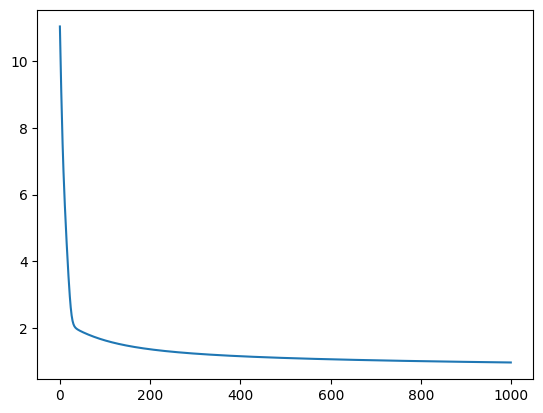

In [73]:
plt.plot(error_hist,label = "Train")

In [74]:
w

array([[ 1.06729094, -1.92372458,  0.05633061],
       [ 0.21168396,  0.31366921, -0.86289766],
       [ 0.58866056, -0.40691308, -0.62696331],
       [-0.84096782,  0.03094306,  1.48298028],
       [-2.4302818 ,  0.37703976, -0.04085157]])

### Test

In [76]:
x_test_aug = np.hstack((np.ones((len(x_test),1)),x_test))
x_test_aug.shape,y_test.shape

((30, 5), (30,))

In [64]:
y_hat_test = multi_logistic_regression(x_test_aug,w)
y_hat_test

array([[0.03312491, 0.49682817, 0.42166562],
       [0.90855178, 0.13645351, 0.00427159],
       [0.00164778, 0.65486849, 0.84738786],
       [0.0381044 , 0.38714316, 0.41260675],
       [0.05359098, 0.47762301, 0.25536451],
       [0.92058188, 0.14418198, 0.00516083],
       [0.14488193, 0.29606368, 0.19538468],
       [0.02164907, 0.29794651, 0.44262459],
       [0.05796078, 0.51055075, 0.35645903],
       [0.11321952, 0.38964128, 0.225206  ],
       [0.0151833 , 0.3330249 , 0.54669328],
       [0.90224467, 0.2082956 , 0.0092194 ],
       [0.95321437, 0.14114101, 0.00281012],
       [0.89098291, 0.20750214, 0.00935822],
       [0.8839059 , 0.12005754, 0.00734692],
       [0.03044846, 0.3342416 , 0.39353535],
       [0.00366212, 0.42903272, 0.81987346],
       [0.10146029, 0.44211839, 0.27327703],
       [0.03061415, 0.44160403, 0.49716604],
       [0.005215  , 0.43233665, 0.79203635],
       [0.83266417, 0.19166884, 0.01555917],
       [0.01671215, 0.37123285, 0.58481401],
       [0.

In [65]:
accuracy(y_test,y_hat_test)

0.9

In [66]:
y_test,np.argmax(y_hat_test,1)

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]))

## Multiclass Classification (sklearn)**

In [67]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X[:, [0,3]], y, test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((120, 2), (120,), (30, 2), (30,))

In [69]:
model = LogisticRegression(multi_class='multinomial')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

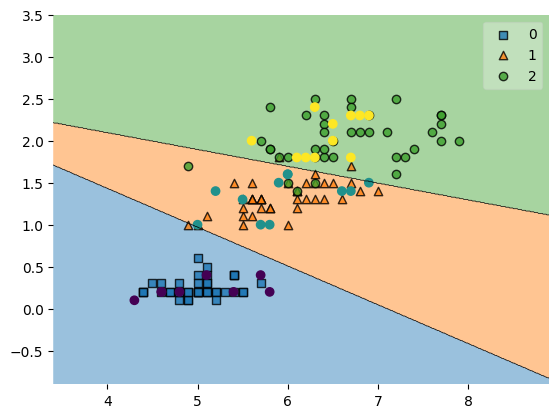

In [70]:
plot_decision_regions(x_train,y_train,clf  = model)
plt.scatter(x_test[:,0],x_test[:,1], c= y_test)

In [71]:
model = SGDClassifier(loss = 'log_loss', penalty='l1')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6333333333333333

<Axes: >

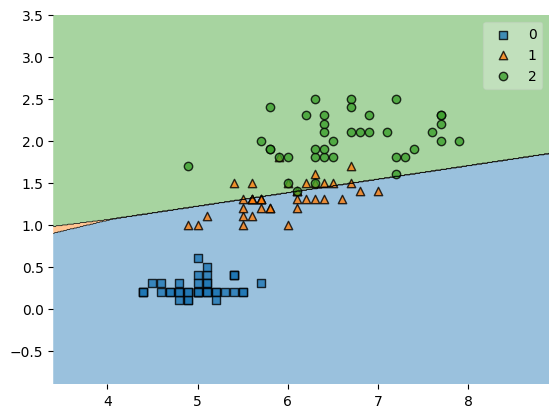

In [72]:
plot_decision_regions(x_train, y_train, clf=model)

## **🔸 Evaluation Metrics**

In [73]:
df = pd.read_csv('/content/exam.csv')
df.head()

,study_hours,pass_fail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [74]:
X = df[['study_hours']].values
y = df['pass_fail'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10, 1), (10, 1), (10,), (10,))

In [75]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

### Threshold

In [76]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [93]:
y_hat = model.predict_proba(x_test)[:,1]
y_hat

array([6.58245084e-06, 9.60541163e-01, 9.73191773e-01, ...,
       3.02250453e-07, 9.45332316e-01, 7.67603114e-03])

In [94]:
t = 0.2
y_hat_binary = y_hat.copy()
print(y_hat_binary.shape)
y_hat_binary[y_hat < t] = 0
y_hat_binary[y_hat >= t] = 1
y_hat_binary.shape

(15000,)


(15000,)

(55250, 2) (29750, 2) (15000, 2)
(14821,) (14929,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


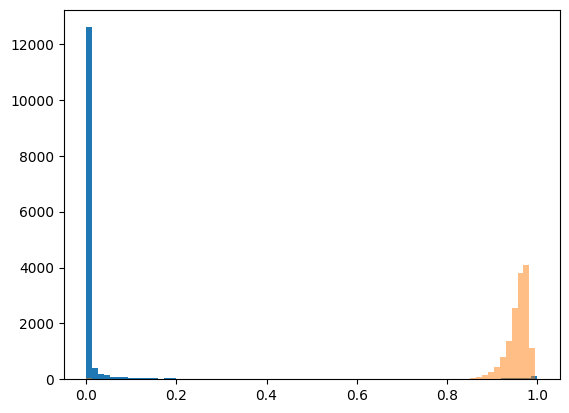

In [95]:
X, y = make_classification(n_samples=100000, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.0,
                           random_state=12)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.35)
print(x_train.shape, x_valid.shape, x_test.shape)

model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_hat = model.predict_proba(x_valid)[:, 1]

negatives = y_hat[y_valid==0]
positives = y_hat[y_valid==1]
print(positives.shape, negatives.shape)

plt.hist(negatives, 75)
plt.hist(positives, 75, alpha=0.5);

### TP FP TN FN (from scratch)

In [97]:
print(y_hat_binary.shape)
print(y_test.shape)

(15000,)
(15000,)


In [99]:
tp = np.sum((y_hat_binary == 1) & (y_test == 1))
tp

3909

In [100]:
fp = np.sum((y_hat_binary == 1) & (y_test == 0))
fp

4011

In [101]:
tn = np.sum((y_hat_binary == 0) & (y_test == 0))
tn

3550

In [102]:
fn = np.sum((y_hat_binary == 0) & (y_test == 1))
fn

3530

### TP FP TN FN (sklearn)

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test,y_hat_binary)

array([[3550, 4011],
       [3530, 3909]])

### TPR FPR TNR FNR (from scratch)

In [105]:
tpr = tp/(tp+fn)
tpr

0.5254738540126361

In [106]:
fpr = fp/(fp+tn)
fpr

0.5304853855310144

In [107]:
tnr = tn/(tn+fp)
tnr

0.46951461446898557

In [108]:
fnr = fn/(fn+tp)
fnr

0.47452614598736387

# Exercise


In [109]:
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.,
                           random_state=12)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [111]:
y_hat = model.predict_proba(x_test)[:,1]
y_hat

array([9.05178335e-04, 9.34237444e-01, 4.43263987e-01, ...,
       1.28450381e-01, 1.95174509e-01, 2.77033556e-03])

In [112]:
t = 0.4
y_hat_binary = y_hat.copy()
y_hat_binary[y_hat < t] = 0
y_hat_binary[y_hat >= t] = 1
y_hat_binary

array([0., 1., 1., ..., 0., 0., 0.])

<Axes: >

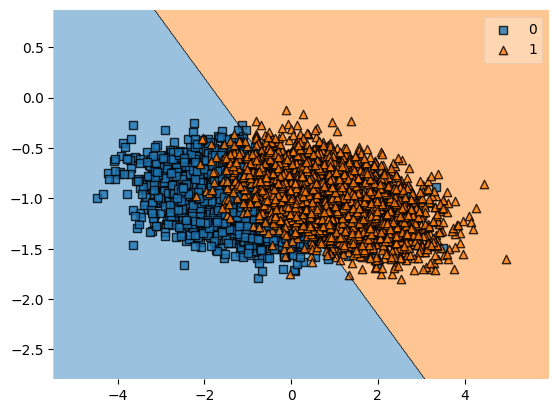

In [113]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train,y_train,clf = model)


In [117]:
def FN_FP_TN_TP(y_hat_binary,y_test):
  tp = np.sum((y_hat_binary == 1) & (y_test == 1))
  fp = np.sum((y_hat_binary == 1) & (y_test == 0))
  tn = np.sum((y_hat_binary == 0) & (y_test == 0))
  fn = np.sum((y_hat_binary == 0) & (y_test == 1))

  print(f"TP is:{tp} and FP is:{fp} and TN is:{tn} and FN is:{fn}")

In [118]:
FN_FP_TN_TP(y_hat_binary,y_test)

TP is:869 and FP is:202 and TN is:821 and FN is:108


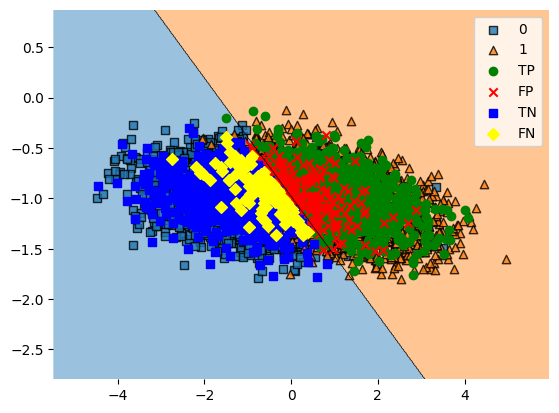

In [119]:
import matplotlib.pyplot as plt
tp_x = []
tp_y = []
fp_x = []
fp_y = []
tn_x = []
tn_y = []
fn_x = []
fn_y = []
for i in range(len(y_test)):
  if y_hat_binary[i] == 1 and y_test[i] == 1:
    tp_x.append(x_test[i,0])
    tp_y.append(x_test[i,1])
  elif y_hat_binary[i] == 1 and y_test[i] == 0:
    fp_x.append(x_test[i,0])
    fp_y.append(x_test[i,1])
  elif y_hat_binary[i] == 0 and y_test[i] == 0:
    tn_x.append(x_test[i,0])
    tn_y.append(x_test[i,1])
  elif y_hat_binary[i] == 0 and y_test[i] == 1:
    fn_x.append(x_test[i,0])
    fn_y.append(x_test[i,1])

plot_decision_regions(x_train,y_train,clf = model)
plt.scatter(tp_x, tp_y, c='green', marker='o', label='TP')
plt.scatter(fp_x, fp_y, c='red', marker='x', label='FP')
plt.scatter(tn_x, tn_y, c='blue', marker='s', label='TN')
plt.scatter(fn_x, fn_y, c='yellow', marker='D', label='FN')
plt.legend()
plt.show()


#roc

In [120]:
from sklearn.metrics import roc_curve,roc_auc_score,RocCurveDisplay

In [122]:
fpr , tpr , threshold = roc_curve(y_test,y_hat)
fpr.shape, tpr.shape, threshold.shape

((450,), (450,), (450,))

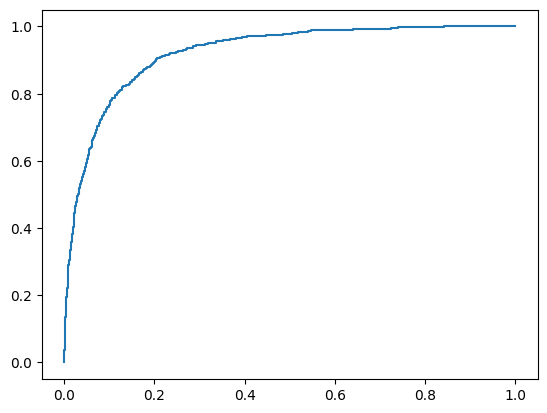

In [124]:
plt.plot(fpr,tpr)

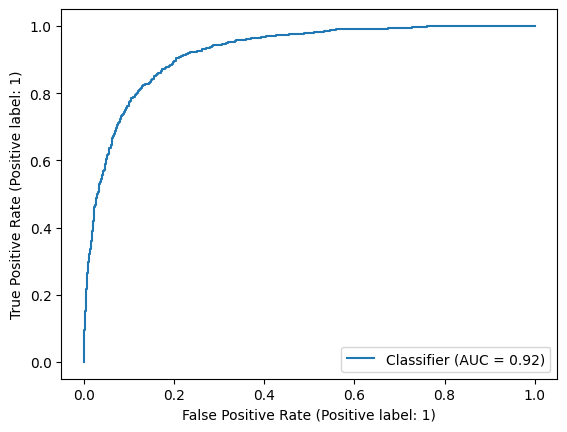

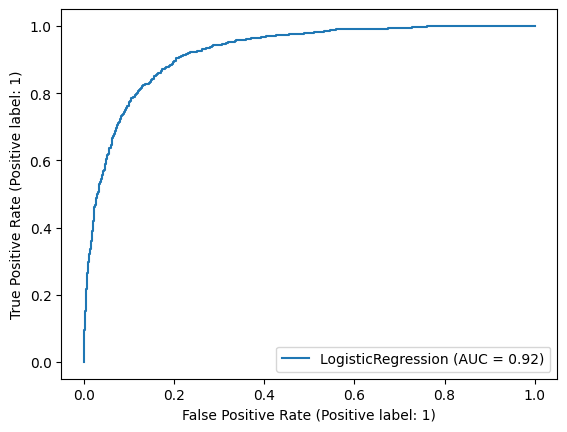

In [127]:
RocCurveDisplay.from_predictions(y_test,y_hat)
RocCurveDisplay.from_estimator(model,x_test,y_test)

In [128]:
roc_auc_score(y_test, y_hat)

0.9222838881768456

### Precision & Recall (sklearn)

In [130]:
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,average_precision_score,PrecisionRecallDisplay,f1_score

In [131]:
threshold = 0.5
y_hat_binary = np.where(y_hat<threshold,0,1)
precision_score(y_test,y_hat_binary)

0.8366935483870968

In [132]:
recall_score(y_test,y_hat_binary)

0.849539406345957

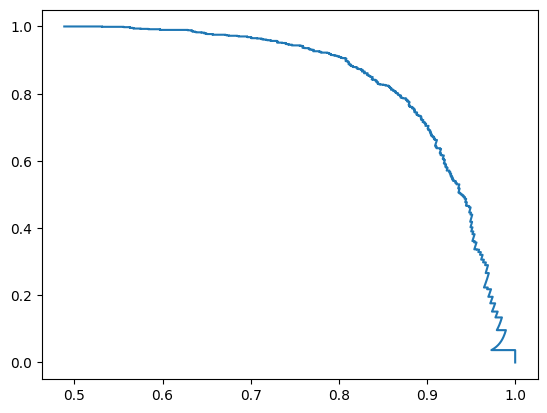

In [134]:
precision, recall , threshold = precision_recall_curve(y_test,y_hat)
plt.plot(precision,recall)

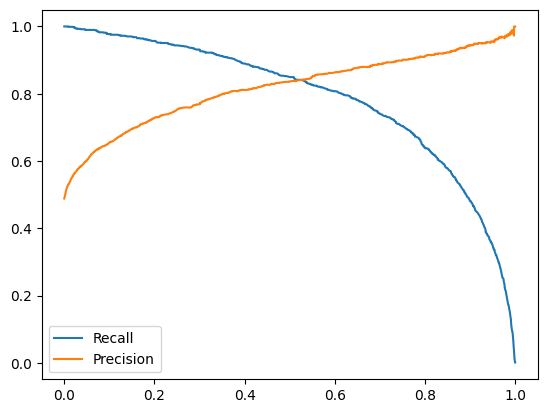

In [137]:
plt.plot(threshold,recall[:-1])
plt.plot(threshold,precision[:-1])
plt.legend(["Recall","Precision"])

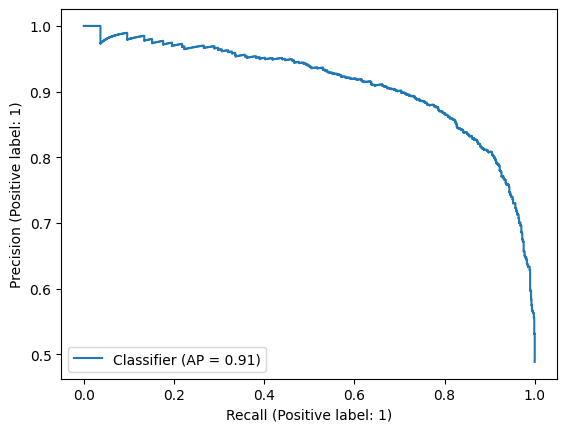

In [139]:
PrecisionRecallDisplay.from_predictions(y_test,y_hat)

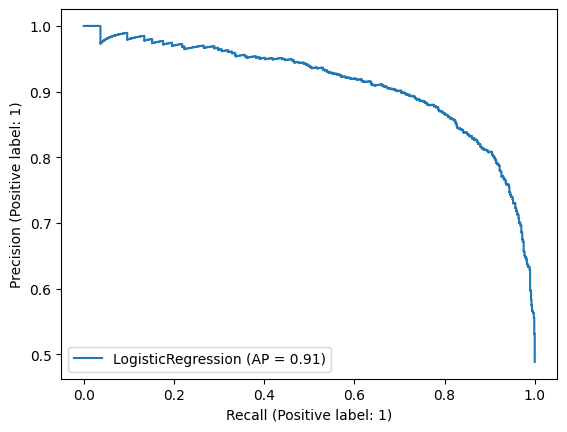

In [140]:
PrecisionRecallDisplay.from_estimator(model,x_test,y_test)

In [141]:
f1_score(y_test,y_hat_binary)

0.8430675469781614

In [142]:
precision_score(y_test,y_hat_binary)

0.8366935483870968

### Confusion Matrix (sklearn)

In [153]:
from sklearn.metrics import ConfusionMatrixDisplay

In [145]:
X,y = load_iris(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [148]:
model = LogisticRegression(penalty = 'none')
model.fit(x_train,y_train)
y_hat = model.predict(x_train)
y_hat

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [149]:
confusion_matrix(y_train,y_hat)

array([[40,  0,  0],
       [ 0, 40,  1],
       [ 0,  1, 38]])

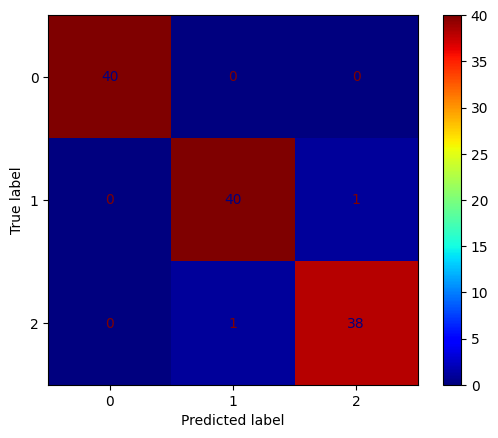

In [154]:
ConfusionMatrixDisplay.from_predictions(y_train,y_hat, cmap = 'jet')